# **Analysis of the data**

## **Preliminary steps**

In [1]:
### PACKAGES

import pandas as pd
import numpy as np

In [2]:
### FUNCTIONS

from src.libs import preprocessing, visualization

from src.configs import names, constants

In [3]:
pd.set_option("display.max_columns", None)

## **RAW DATA**

In [4]:
### LOAD DATA

df_gpt = preprocessing.load_dataset(source="GPT", type="POETRY")
df_bard = preprocessing.load_dataset(source="BARD", type="POETRY")
df_human = preprocessing.load_dataset(source="Human", type="POETRY")

Time taken to load dataset: 0.015888690948486328 seconds
Time taken to load dataset: 0.00711822509765625 seconds
Time taken to load dataset: 0.34998655319213867 seconds


In [ ]:
### GET TRAIN SPLIT

df_train_gpt, _ = preprocessing.train_valid_split(df_gpt)
df_train_bard, _ = preprocessing.train_valid_split(df_bard)
df_train_human, _ = preprocessing.train_valid_split(df_human)


In [6]:
### CHECK SHAPES

print(f"Shape of the GPT train set : {df_train_gpt.shape}")
print(f"Shape of the BARD train set : {df_train_bard.shape}")
print(f"Shape of the HUMAN train set : {df_train_human.shape}")

Shape of the GPT train set : (225, 2)
Shape of the BARD train set : (225, 2)
Shape of the HUMAN train set : (12468, 4)


In [7]:
### CHECK STRUCTURE - GPT

df_train_gpt.sample(n=5)

,prompts,responses
111,write a poem about a secret you never told anyone,"Locked tight and hidden deep,\nA secret I've n..."
10,write a poetry about friendship,"Friendship, oh friendship\nA bond that will ne..."
232,Poetry title: Symphony of Serenity,"Amidst the chaos, a symphony of serenity\nEcho..."
189,write a poem about a jungle you avoid,"In the heart of the jungle, deep and vast\nLie..."
148,write a poem about a flower you find beautiful,"Oh fair and gentle flower, so lovely to behold..."


In [ ]:
### CHECK STRUCTURE - BARD

df_train_bard.sample(n=5)


,prompts,BARD
238,Make a Make a Poetry with title: Beneath the m...,"Beneath the moon's soft glow, a whispering bre..."
90,write a poetry about shape,"The Shape of Things\r\n\r\nA circle, round and..."
37,write a poetry about cloud,"Clouds\r\n\r\nThey float in the sky,\r\nSoarin..."
35,write a poetry about wind,"Wind\r\n\r\nA whisper in the trees,\r\nA breat..."
175,write a poem about a quasar you find fascinati...,"Quasar\r\n\r\nA brilliant point of light,\r\nS..."


In [ ]:
### CHECK STRUCTURE - HUMAN

df_train_human.sample(n=5)


,Title,Poem,Poet,Tags
118,\r\r\nfrom Zero Hour\r\r\n,"\r\r\nTropical nights in Central America,\r\r\...",Ernesto Cardenal,"Social Commentaries,History & Politics"
59,\r\r\n The World Is in Penc...,\r\r\n—not pen. It’s gotthat same silken dust ...,Todd Boss,NaN
150,\r\r\n Feeling the draft\r\...,\r\r\nWe were young and it was an accomplishme...,Bob Hicok,"Living,Coming of Age,Sorrow & Grieving,Philoso..."
96,\r\r\n Elegy for the Native...,\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n ...,Natasha Trethewey,"Living,Death,Nature,Weather,Social Commentarie..."
90,\r\r\n I Only Am Escaped Al...,\r\r\nI tell you that I see her still\r\r\nAt ...,Howard Nemerov,"Living,Marriage & Companionship,Nature,Animals..."


In [10]:
df_train_human[df_train_human["Poem"].str.len() < 10]

,Title,Poem,Poet,Tags
23,\r\r\n Series of Pictures\r...,\r\r\n\r\r\n,Joel Lipman,NaN
8,"\r\r\n ""That others praised...",\r\r\n\r\r\n,Stephen Dobyns,NaN
0,\r\r\n Tinder and Flint\r\r...,\r\r\n\r\r\n,Lew R. Sarett,NaN
5,\r\r\n KERN 2\r\r\n ...,\r\r\n\r\r\n,derek beaulieu,NaN
11,\r\r\n So Ordered\r\r\n ...,\r\r\n\r\r\n,Merrill Moore,NaN
...,...,...,...,...
7,"\r\r\n ""By not believing in...",\r\r\n\r\r\n,Stephen Dobyns,NaN
0,\r\r\n Poem on His Birthday...,\r\r\n\r\r\n,Dylan Thomas,NaN
119,\r\r\n From “BalloonCloudBu...,\r\r\n\r\r\n,Mark Laliberte,NaN
2,\r\r\n Color of Dreams\r\r\...,\r\r\n\r\r\n,Witter Bynner,NaN


In [11]:
### CHECK MISSING VALUES

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Missing values in {name} dataset :")
    print(df.isna().sum())
    print("\n")

Missing values in GPT dataset :
prompts      0
responses    0
dtype: int64


Missing values in BARD dataset :
prompts    0
BARD       0
dtype: int64


Missing values in HUMAN dataset :
Title      0
Poem       0
Poet       0
Tags     849
dtype: int64




In [ ]:
### CHECK EMPTY TEXT

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Empty text in {name} dataset :")
    if name == "BARD":
        print(len(df[df["BARD"] == ""]))
    elif name == "GPT":
        print(len(df[df["responses"] == ""]))
    elif name == "HUMAN":
        print(len(df[df["Poem"] == "\r\r\n"]))
    print("\n")


Empty text in GPT dataset :
0


Empty text in BARD dataset :
0


Empty text in HUMAN dataset :
0




In [ ]:
### CHECK DUPLICATES

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Duplicate rows in {name} dataset :")
    print(df.duplicated().sum())
    print("\n")


Duplicate rows in GPT dataset :
0


Duplicate rows in BARD dataset :
2


Duplicate rows in HUMAN dataset :
7




## **CLEAN DATA**

In [ ]:
### CLEAN AND CONCATENATE DATASETS

df_train = preprocessing.get_poetry_dataset(df_train_gpt, df_train_bard, df_train_human)


In [ ]:
### CHECK

df_train.sample(10)


,text,abstract,label
4842,1. Josef Mengele Drowns While Swimming at a Be...,\r\r\n What We Know of Deat...,0
1727,The first morning of Three Mile Island: those ...,\r\r\n Tar\r\r\n ...,0
5193,I got a letter from the government.It said let...,\r\r\n Sweet Virginia\r\r\n...,0
5190,"There was an Old Man with a beard, Who said, ""...",\r\r\n There was an Old Man...,0
3403,"Live jazz at El Fresco is one guy, electric pl...",\r\r\n Saint Patrick’s Agai...,0
8437,The laughing gull that flew behind the fencepo...,\r\r\n The Totality of Fact...,0
7014,I. “If the Night Could Get Up & Walk” ...,\r\r\n Two Pastorals for Sa...,0
3643,Look deep into the blueberry eyes of breakfast.,\r\r\n Still Life #1\r\r\n ...,0
2869,"Late in November, on a single night Not even n...",\r\r\n The Consent\r\r\n ...,0
11840,The Dying Words of Goethe “Light! more ligh...,\r\r\n Let the Light Enter\...,0


In [ ]:
### CHECK EMPTY TEXTS

df_train[df_train["text"] == ""]


,text,abstract,label


In [21]:
### CHECK SPLIT

df_train[names.LABEL].value_counts()


label
0    12368
1      225
2      223
Name: count, dtype: int64

## **PLOTS**

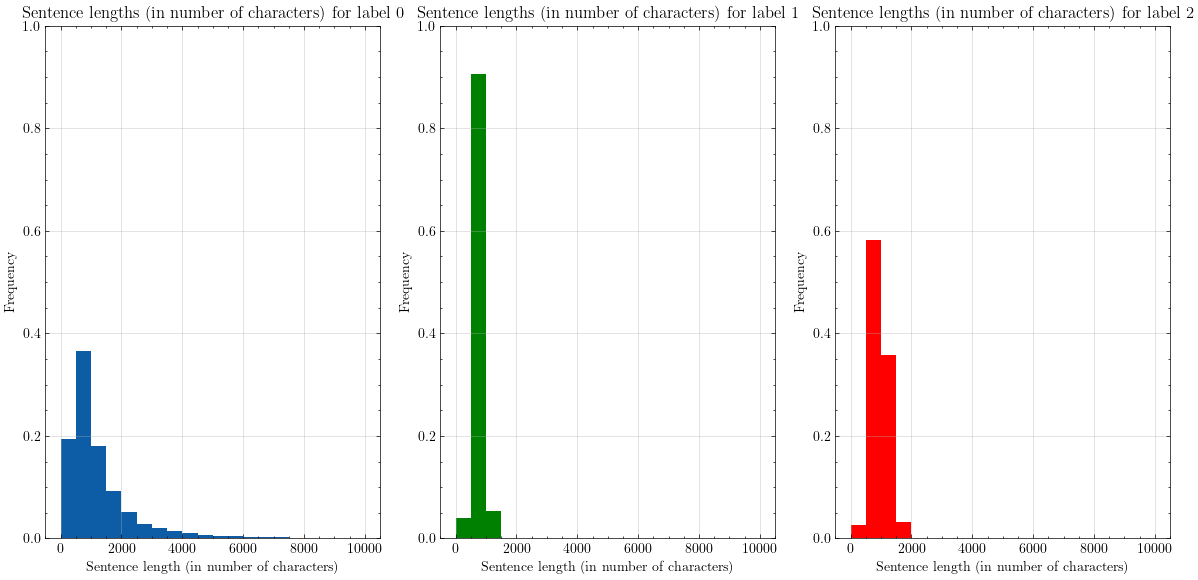

In [18]:
### PLOT ABSTRACT LENGTH DISTRIBUTION (CHARACTERS)

sentence_lengths_chars = np.array(df_train[names.TEXT].str.len())
visualization.plot_histogram_sentence_length(
    sentence_lengths=sentence_lengths_chars,
    labels=df_train[names.LABEL],
    type="characters",
)

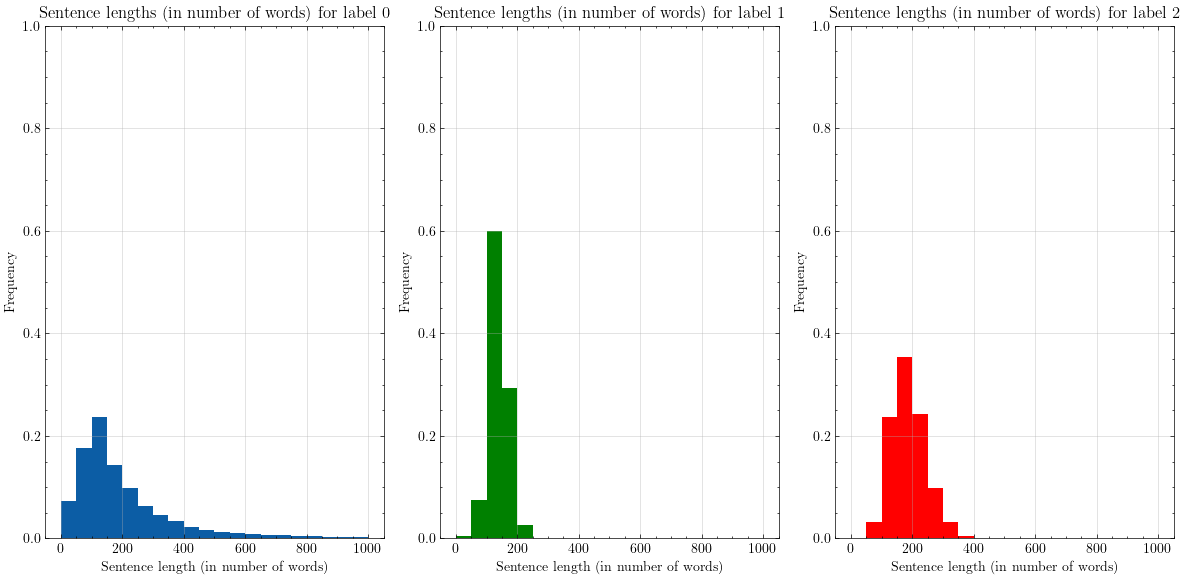

In [19]:
### PLOT ABSTRACT LENGTH DISTRIBUTION (WORDS)

sentence_lengths_words = np.array(df_train[names.TEXT].str.split().str.len())
visualization.plot_histogram_sentence_length(
    sentence_lengths=sentence_lengths_words, labels=df_train[names.LABEL], type="words"
)

In [ ]:
### PLOT WORDCLOUD FOR EACH TEXT

texts = df_train[names.TEXT].to_numpy()
labels = df_train[names.LABEL].to_numpy()

visualization.plot_wordcloud_slider(texts=texts, labels=labels)


interactive(children=(IntSlider(value=0, description='ID', max=12815), Output()), _dom_classes=('widget-intera…